In [67]:
import numpy as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statistics import mode
import matplotlib.ticker as ticker
!pip install scipy
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

In [1]:
#ACCESS gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#access the file
df = pd.read_csv('/content/gdrive/My Drive/abtest_data.csv')

In [4]:
df

,uid,timestamp,group,device,gender,country,purchases
0,94281205,2023-11-01 00:02:58,control,I,F,DEU,0
1,94089059,2023-11-01 00:02:58,treatment,A,M,MEX,0
2,95943267,2023-11-01 00:04:49,treatment,I,M,TUR,0
3,96108931,2023-11-01 00:04:49,control,I,F,USA,0
4,48172937,2023-11-01 00:06:38,control,I,M,USA,0
...,...,...,...,...,...,...,...
45878,85180718,2023-11-30 23:52:22,control,I,M,GBR,0
45879,53475629,2023-11-30 23:58:36,treatment,I,M,BRA,0
45880,53366393,2023-11-30 23:58:36,control,A,M,USA,0
45881,40667897,2023-11-30 23:59:35,control,I,F,TUR,0


In [5]:
#check null
df.isnull().sum()

,0
uid,0
timestamp,0
group,0
device,0
gender,0
country,0
purchases,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45883 entries, 0 to 45882
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        45883 non-null  int64 
 1   timestamp  45883 non-null  object
 2   group      45883 non-null  object
 3   device     45883 non-null  object
 4   gender     45883 non-null  object
 5   country    45883 non-null  object
 6   purchases  45883 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.5+ MB


In [7]:
#change timestamp in to time format
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45883 entries, 0 to 45882
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   uid        45883 non-null  int64         
 1   timestamp  45883 non-null  datetime64[ns]
 2   group      45883 non-null  object        
 3   device     45883 non-null  object        
 4   gender     45883 non-null  object        
 5   country    45883 non-null  object        
 6   purchases  45883 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 2.5+ MB


In [20]:
df.loc[df['uid'] == 53366393]

,uid,timestamp,group,device,gender,country,purchases
45880,53366393,2023-11-30 23:58:36,control,A,M,USA,0


In [49]:
#number of data control and data treatment
df_control = df[df['group'] == 'control']
df_treatment = df[df['group'] == 'treatment']


In [50]:
#number of data control
n_control = df_control.shape[0]

In [51]:
#number of data control purchasing
n_control_purchase = df_control[df_control['purchases'] == 1].shape[0]

In [52]:
#number of data treatment
n_treatment = df_treatment.shape[0]

In [53]:
#number of data treatment purchasing
n_treatment_purchase = df_treatment[df_treatment['purchases'] == 1].shape[0]

In [54]:
conversion_rate_control = n_control_purchase / n_control


In [55]:
conversion_rate_control

0.03431844015038909

In [56]:
conversion_rate_treatment = n_treatment_purchase / n_treatment

In [57]:
conversion_rate_treatment

0.03794167499674041

In [59]:
count_converted = [n_treatment_purchase, n_control_purchase]
count_observation = [n_treatment, n_control]

In [74]:
from statsmodels.stats.proportion import proportions_ztest

#calculate z stat and p-value
z_stat, p_value = proportions_ztest(count = count_converted, nobs = count_observation, alternative = 'larger')

#calculating z critical
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)

#print hasil
print(f'Z-statistics: {z_stat:.2f}')
print(f'P-value: {p_value:.3f}')
print(f'Z-critical: {z_critical:.2f}')

Z-statistics: 2.08
P-value: 0.019
Z-critical: 1.64


In [64]:
#pemaparan conclusion
if p_value < alpha:
  print('Reject null hypothesis (GO FORWARD WITH THE TREATMENT)')
else:
  print('Fail to reject null hypothesis (JUST USE EXISTING CONTROL PAGE)')

Reject null hypothesis (GO FORWARD WITH THE TREATMENT)


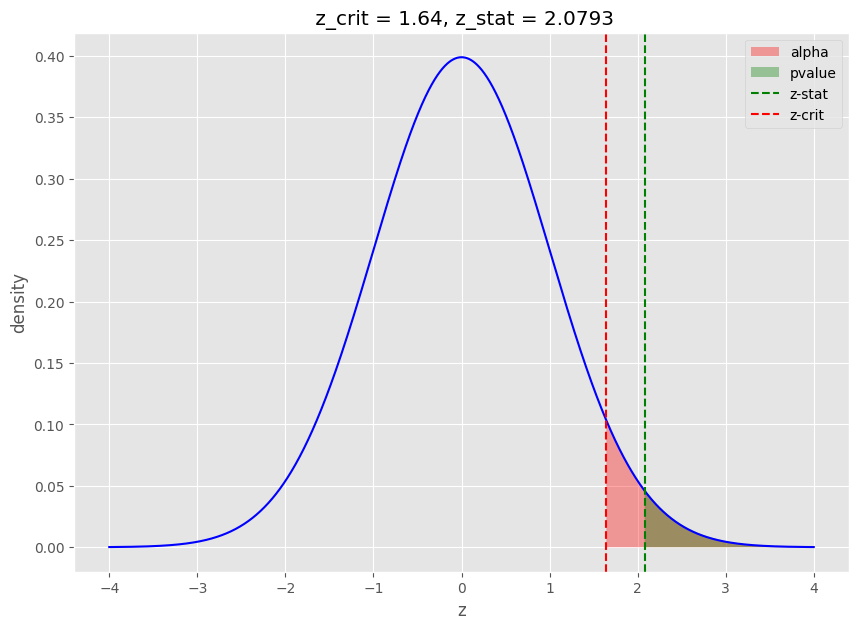

In [80]:
#plot the chart
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(10,7))

#Visualization
plt.style.use('ggplot')

#plot sample distribution
x_sample= np.arange(-4.,4., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)

# Plot the normal distribution
ax.plot(x_sample, y_sample, color='blue')

#plot alpha region
x_alpha= np.arange(z_critical, 4., 0.001)
y_alpha= stats.norm.pdf(x_alpha)
ax.fill_between(x= x_alpha, y1= y_alpha, facecolor= "red", alpha = 0.35,label= 'alpha')

# plot pvalue
x_pvalue = np.arange(z_stat, 4., 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = 114)
ax.fill_between(x = x_pvalue, y1 = y_pvalue, facecolor = 'green', alpha = 0.35, label = 'pvalue')

# plot z-crit and z-stats
plt.axvline(np.round(z_stat, 4), color ="green", linestyle = "--", label ="z-stat")
plt.axvline(z_critical, color ="red", linestyle = "--", label ="z-crit")

plt.legend()
plt.xlabel("z")
plt.ylabel("density")
plt.title(f' z_crit = {z_critical:.2f}, z_stat = {np.round(z_stat, 4)}')
plt.show()